# PARTE A - EJERCICIO 1


In [ ]:
import pandas as pd

In [ ]:
from google.colab import files

In [ ]:
import sys
!{sys.executable} -m pip install wbdata #instalamos la  base de datos mundial

In [ ]:
help(wbdata) # nos indica todo lo que incluye este paquete

Help on package wbdata:

NAME
    wbdata - wbdata: A wrapper for the World Bank API

PACKAGE CONTENTS
    cache
    client
    dates
    fetcher

FUNCTIONS
    get_default_client() -> wbdata.client.Client
        Get the default client

VERSION
    1.0.0

FILE
    /usr/local/lib/python3.11/dist-packages/wbdata/__init__.py




In [ ]:
import wbdata

In [ ]:
 wbdata.get_sources() #me fijo que fuentes estan disponibles

  id  name
----  --------------------------------------------------------------------
   1  Doing Business
   2  World Development Indicators
   3  Worldwide Governance Indicators
   5  Subnational Malnutrition Database
   6  International Debt Statistics
  11  Africa Development Indicators
  12  Education Statistics
  13  Enterprise Surveys
  14  Gender Statistics
  15  Global Economic Monitor
  16  Health Nutrition and Population Statistics
  18  IDA Results Measurement System
  19  Millennium Development Goals
  20  Quarterly Public Sector Debt
  22  Quarterly External Debt Statistics SDDS
  23  Quarterly External Debt Statistics GDDS
  25  Jobs
  27  Global Economic Prospects
  28  Global Financial Inclusion
  29  The Atlas of Social Protection: Indicators of Resilience and Equity
  30  Exporter Dynamics Database – Indicators at Country-Year Level
  31  Country Policy and Institutional Assessment
  32  Global Financial Development
  33  G20 Financial Inclusion Indicators
  34  Glob

In [ ]:
wbdata.get_indicators(source=25) #me fijo lo que hay dentro de la fuente elegida, en este caso 'jobs'. elijo 2 indicadores.

id                    name
--------------------  ----------------------------------------------------------------------------------------------------------------
BM.KLT.DINV.WD.GD.ZS  Foreign direct investment, net outflows (% of GDP)
BM.TRF.PWKR.CD.DT     Personal remittances, paid (current US$)
BX.KLT.DINV.WD.GD.ZS  Foreign direct investment, net inflows (% of GDP)
BX.TRF.PWKR.CD        Personal transfers, receipts (BoP, current US$)
CM.MKT.LCAP.GD.ZS     Market capitalization of listed domestic companies (% of GDP)
EG.ELC.ACCS.ZS        Access to electricity (% of population)
EG.USE.ELEC.KH.PC     Electric power consumption (kWh per capita)
EN.POP.DNST           Population density (people per sq. km of land area)
FB.ATM.TOTL.P5        Automated teller machines (ATMs) (per 100,000 adults)
FB.CBK.BRWR.P3        Borrowers from commercial banks (per 1,000 adults)
FP.CPI.TOTL           Consumer price index (2010 = 100)
FP.CPI.TOTL.ZG        Inflation, consumer prices (annual %)
FS.AST.DO

In [ ]:
indicadores = {'SP.RUR.TOTL':'Rural_population', 'SP.URB.TOTL':'Urban_population'} #Escribo cada indiador con sus respectivo id.
#SP.RUR.TOTL                  Rural population
#SP.URB.TOTL                  Urban population

import wbdata

data = wbdata.get_dataframe(indicadores, country=['USA','ARG']) #elijo los paises.
df = data

df.head()



Rural_population  Urban_population
country   date                                    
Argentina 2023         3432229.0        42106172.0
          2022         3475067.0        41932837.0
          2021         3521217.0        41791064.0
          2020         3565194.0        41626771.0
          2019         3601925.0        41371540.0

In [ ]:
df

Rural_population  Urban_population
country       date                                    
Argentina     2023         3432229.0        42106172.0
              2022         3475067.0        41932837.0
              2021         3521217.0        41791064.0
              2020         3565194.0        41626771.0
              2019         3601925.0        41371540.0
...                              ...               ...
United States 1964        54673014.0       137215986.0
              1963        54626596.0       134615404.0
              1962        54549307.0       131988693.0
              1961        54414785.0       129276215.0
              1960        54208527.0       126462473.0

[128 rows x 2 columns]

In [ ]:
df.reset_index(inplace=True) #acomodo los datos para que queden mas ordenada la informacion.
df


,country,date,Rural_population,Urban_population
0,Argentina,2023,3432229.0,42106172.0
1,Argentina,2022,3475067.0,41932837.0
2,Argentina,2021,3521217.0,41791064.0
3,Argentina,2020,3565194.0,41626771.0
4,Argentina,2019,3601925.0,41371540.0
...,...,...,...,...
123,United States,1964,54673014.0,137215986.0
124,United States,1963,54626596.0,134615404.0
125,United States,1962,54549307.0,131988693.0
126,United States,1961,54414785.0,129276215.0


#EJERCICIO 2

In [ ]:
import pandas as pd
import numpy as np

df_grouped = df.groupby(by=["country"]).agg({ "Rural_population": ["min", "max", "mean", "median", "var" ,"std",("Q1", lambda x: x.quantile(0.25)),
 ("Q3", lambda x: x.quantile(0.75))]})
df_agg=df_grouped

df_grouped.reset_index(inplace=True)
df_grouped

print(df_grouped)

df_grouped=df.groupby(by="country"). agg({"Urban_population": ["min", "max", "mean", "median", "var", "std",("Q1", lambda x: x.quantile(0.25)),
 ("Q3", lambda x: x.quantile(0.75))] })
df_agg=df_grouped

df_grouped.reset_index(inplace=True)
df_grouped

print(df_grouped) #para la parte de estadistica descriptiva separamos los dos  indicadores, para comparar dentro de cada uno de ellos los resultados de Argentina y USA.
#usamos la función .groupby().

         country Rural_population                                        \
                              min         max          mean      median   
0      Argentina        3432229.0   5379673.0  4.360468e+06   4204241.5   
1  United States       54047876.0  61656881.0  5.828678e+07  59192061.0   

                                                        
            var           std           Q1          Q3  
0  3.419325e+11  5.847500e+05   3848453.00   4904106.0  
1  5.464824e+12  2.337696e+06  56373518.75  59925861.5  
         country Urban_population                                          \
                              min          max          mean       median   
0      Argentina       15006372.0   42106172.0  2.891006e+07   29257669.0   
1  United States      126462473.0  278977409.0  2.004481e+08  193354303.0   

                                                          
            var           std           Q1            Q3  
0  7.264079e+13  8.522957e+06   21276133.0  

#EJERCICIO 3

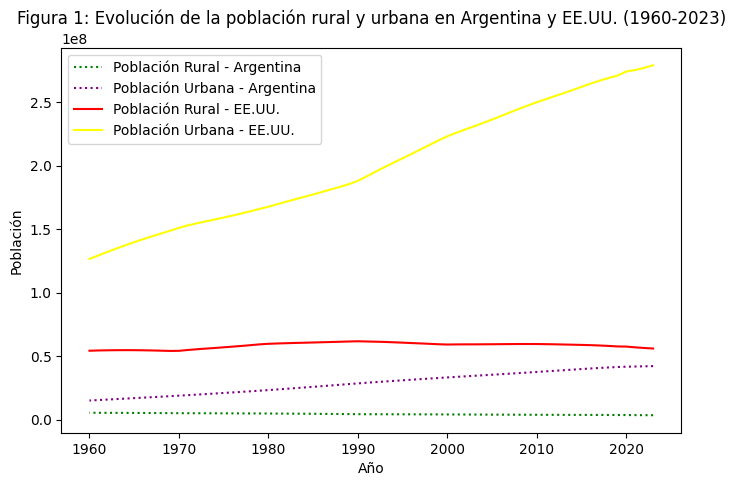

In [ ]:
# Estilo pyplot
import matplotlib.pyplot as plt

# Filtramos los datos de Argentina y EE.UU.
df_filtered = df[df["country"].isin(["Argentina", "United States"])].copy()

# Convertimos la columna "date" a tipo numérico
df_filtered["date"] = df_filtered["date"].astype(int)

# Escogemos el periodo de tiempo (1960-2023)
df_filtered = df_filtered[df_filtered["date"] >= 1960]

# Separar los datos por país
df_arg = df_filtered[df_filtered["country"] == "Argentina"]
df_usa = df_filtered[df_filtered["country"] == "United States"]

# Crear gráfico con estilo Pyplot
plt.figure(figsize=(8, 5))

# Gráfico Argentina
plt.plot(df_arg["date"], df_arg["Rural_population"], label="Población Rural - Argentina", color="green", linestyle="dotted")
plt.plot(df_arg["date"], df_arg["Urban_population"], label="Población Urbana - Argentina", color="purple", linestyle="dotted")

# Gráfico EE.UU.
plt.plot(df_usa["date"], df_usa["Rural_population"], label="Población Rural - EE.UU.", color="red")
plt.plot(df_usa["date"], df_usa["Urban_population"], label="Población Urbana - EE.UU.", color="yellow")

# Labels
plt.xlabel("Año")
plt.ylabel("Población")
plt.title("Figura 1: Evolución de la población rural y urbana en Argentina y EE.UU. (1960-2023)")

# Leyenda
plt.legend()
plt.show()


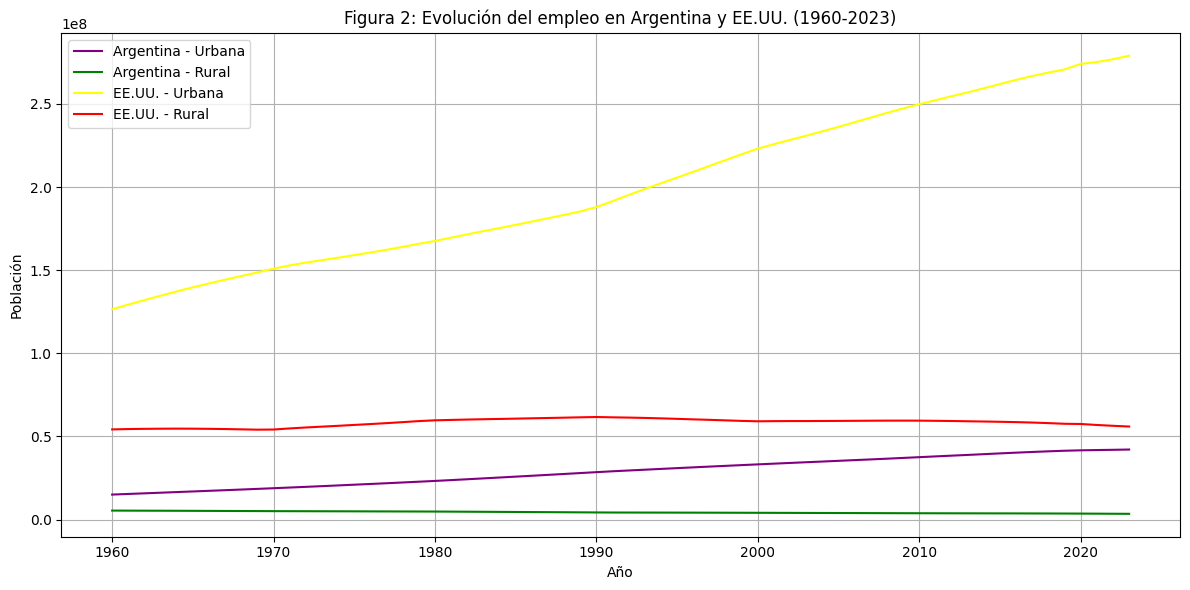

In [ ]:
# Estilo orientado a objetos
fig, ax = plt.subplots(figsize=(12, 6))

# Argentina
ax.plot(df_arg["date"], df_arg["Urban_population"], label="Argentina - Urbana", color="purple")
ax.plot(df_arg["date"], df_arg["Rural_population"], label="Argentina - Rural", color="green")

# EE.UU.
ax.plot(df_usa["date"], df_usa["Urban_population"], label="EE.UU. - Urbana", color="yellow")
ax.plot(df_usa["date"], df_usa["Rural_population"], label="EE.UU. - Rural", color="red")

# Configuración del gráfico
ax.set_xlabel("Año")
ax.set_ylabel("Población")
ax.set_title("Figura 2: Evolución del empleo en Argentina y EE.UU. (1960-2023)")

# Agrego la leyenda
ax.legend()
ax.grid(True)
fig.tight_layout()
plt.show()

#EJERCICIO 4

In [ ]:

!pip install BeautifulSoup4
!pip install pandas
!pip install pandas
# Nota: si no tienen instaladas las librarías a importar debajo, primero deben instalarlas
# (para eso, quiten el # y activen las 3 líneas de código de arriba)

import requests #html requestor
from bs4 import BeautifulSoup #html parser
import

SyntaxError: invalid syntax (<ipython-input-5-b6dad22700d6>, line 9)

In [ ]:
url = "https://www.lanacion.com.ar/"

r = requests.get(url) #traigo el contenido del html
contenido = r.content

soup = BeautifulSoup(contenido, "html.parser")
soup

<!DOCTYPE html>
<html lang="es"><head><meta charset="utf-8"/><meta content="width=device-width,initial-scale=1.0,minimum-scale=0.5,maximum-scale=5.0,user-scalable=yes" name="viewport"/><meta content="#ffffff" name="theme-color"/><title>Últimas noticias de Argentina y el mundo - LA NACION</title><link as="image" fetchpriority="high" href="https://www.lanacion.com.ar/resizer/v2/senado-hay-quorum-para-tratar-los-pliegos-de-de-KBAM6BJ7QBDAJFDPZLX3YUNXTU.jpg?auth=4bfd81efecfee820ba50db1d20c0c773437afe637cffb9d5b6ffe6f7799e1c62&amp;width=488&amp;height=325&amp;quality=70&amp;smart=true" media="(min-width: 768px)" rel="preload"/><link as="image" fetchpriority="high" href="https://www.lanacion.com.ar/resizer/v2/senado-hay-quorum-para-tratar-los-pliegos-de-de-KBAM6BJ7QBDAJFDPZLX3YUNXTU.jpg?auth=4bfd81efecfee820ba50db1d20c0c773437afe637cffb9d5b6ffe6f7799e1c62&amp;width=420&amp;height=280&amp;quality=70&amp;smart=true" media="(max-width: 767px)" rel="preload"/><link as="image" fetchpriority="high

In [ ]:
<h2 class="text ln-text title --prumo --font-medium --font-m-l" data-mrf-layout-title=""><span class="text ln-text lead --prumo --font-extra">Duro revés para el Gobierno.<!-- --> </span>
El Senado rechazó por abrumadora mayoría los pliegos de Lijo y García-Mansilla</h2>

In [ ]:
h2_element = soup.find('h2', class_='text ln-text title --prumo --font-medium --font-m-l')

# Obtenemos el texto del elemento <h2>
h2_text = h2_element.text.strip()  # strip() permite remover espacios sobrantes

#print(h2_element)
print('\n', h2_text)


 Fracaso de Milei. Cómo votó cada senador los pliegos de Lijo y García-Mansilla para la Corte Suprema


In [ ]:
h2_elements = soup.find_all('h2')

#print(type(h2_elements))
print('\n', h2_elements)


 [<h2 class="text ln-text subhead --font-s">Es la primera vez, desde 1983, que la Cámara alta vota en contra de candidatos propuestos por el Poder Ejecutivo; la oposición al juez federal superó los 40 votos, mientras que el catedrático fue vetado casi por más de medio centenar de legisladores</h2>, <h2 class="text ln-text title --prumo --font-medium --font-m-l"><span class="text ln-text lead --prumo --font-extra">Fracaso de Milei.<!-- --> </span>Cómo votó cada senador los pliegos de Lijo y García-Mansilla para la Corte Suprema</h2>, <h2 class="text ln-text title --prumo --font-medium --font-m-l"><span class="text ln-text lead --prumo --font-extra">Evento en Mar-a-Lago.<!-- --> </span>Milei afirmó que la Argentina “readecuará” la normativa para cumplir con los requisitos de aranceles de Trump</h2>, <h2 class="text ln-text title --prumo --font-medium --font-m-l"><span class="text ln-text lead --prumo --font-extra">La votación del Senado.<!-- --> </span>Derrota inapelable con serias cons

In [ ]:
for h2_element in h2_elements:
    h2_text = h2_element.text.strip()
    print(h2_text)

# Aclaración: el nombre del ítem por el que iteramos puede ser el que nosotros queramos, por ejemplo: i
for i in h2_elements:
    h2_text = i.text.strip()
    print(h2_text)

Es la primera vez, desde 1983, que la Cámara alta vota en contra de candidatos propuestos por el Poder Ejecutivo; la oposición al juez federal superó los 40 votos, mientras que el catedrático fue vetado casi por más de medio centenar de legisladores
Fracaso de Milei. Cómo votó cada senador los pliegos de Lijo y García-Mansilla para la Corte Suprema
Evento en Mar-a-Lago. Milei afirmó que la Argentina “readecuará” la normativa para cumplir con los requisitos de aranceles de Trump
La votación del Senado. Derrota inapelable con serias consecuencias
Medida cautelar. Un juez ordenó que García-Mansilla se abstenga de tomar decisiones en la Corte
Nuevo mapa. Región por región, quiénes son los ganadores y perdedores de los aranceles de Trump
"Motivos políticos". El Gobierno repudió la decisión del Senado de rechazar a Lijo y García-Mansilla
Un caso inédito. La opinión mayoritaria de los constitucionalistas es que García-Mansilla debe dejar de inmediato la Corte
Vínculo riesgoso. Trump, un amigo

In [ ]:
titulos = [] # primero creamos una lista

# Extraemos el texto de cada elemento <h2> y ahora guardamos
for h2_element in h2_elements:
    h2_text = h2_element.text.strip()
    #print(h2_text)

    titulos.append({
        'titular': h2_text
    })

# Creamos un dataframe a partir de la lista de títulos
titulos_df = pd.DataFrame(titulos)

In [ ]:
titulos_df

,titular
0,"Es la primera vez, desde 1983, que la Cámara a..."
1,Fracaso de Milei. Cómo votó cada senador los p...
2,Evento en Mar-a-Lago. Milei afirmó que la Arge...
3,La votación del Senado. Derrota inapelable con...
4,Medida cautelar. Un juez ordenó que García-Man...
...,...
128,Playa de lujo. La exclusiva isla que recibe de...
129,Quini 6. Cuáles fueron los números de la suert...
130,"Fechas locales. Calendario de elecciones 2025,..."
131,Se viene. Cómo ver el Quilmes Rock 2025 en vivo


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime

# URL de la portada
url = "https://www.lanacion.com.ar/"

# Hacemos la petición
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# Extraemos todos los <a> que tienen href (enlaces)
noticias = soup.find_all('a', href=True)

# Dominio del diario
dominio = "https://www.lanacion.com.ar"

# Creamos listas para los títulos y los links
titulos = []
links = []

for a in noticias:
    href = a['href']
    texto = a.get_text(strip=True)

    # Nos aseguramos de que tenga texto y que parezca una noticia
    if texto and ('/nota' in href or href.startswith('/')):
        # Si no tiene el dominio, lo agregamos
        if href.startswith('/'):
            href = dominio + href

        # Evitamos duplicados
        if href not in links:
            titulos.append(texto)
            links.append(href)

# Creamos el DataFrame
df = pd.DataFrame({
    "titulo": titulos,
    "link": links,
    "fecha_scraping": datetime.now().strftime("%Y-%m-%d")
})

# Exportamos a Excel
df.to_excel("noticias_lanacion.xlsx", index=False)

# Si estás en Google Colab, descargalo automáticamente
try:
    from google.colab import files
    files.download("noticias_lanacion.xlsx")
except:
    print("✅ Archivo 'noticias_lanacion.xlsx' guardado en tu carpeta local.")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>